# Training and Evaluation

## Setup

In [1]:
import os, sys, random
from sys import platform
_base_path = '\\'.join(os.getcwd().split('\\')[:-1]) + '\\' if platform == 'win32' else '/'.join(os.getcwd().split('/')[:-1]) + '/'
sys.path.append(_base_path)
from monai.utils import set_determinism
import src.modules.plotting as plot
from src.helpers.utils import make_dataset, get_device
from src.modules.training import train_test_splitting, training_model, predict_model
from src.helpers.config import get_config
from src.modules.preprocessing import get_transformations
from src.models.densenetmm import DenseNetMM

In [2]:
_config = get_config()
saved_path = os.path.join(_base_path, _config.get('SAVED_FOLDER'))
reports_path = os.path.join(_base_path, _config.get('REPORT_FOLDER'))
logs_path = os.path.join(_base_path, _config.get('LOG_FOLDER'))
if platform == 'win32':
	saved_path = saved_path.replace('/', '\\')
	reports_path = reports_path.replace('/', '\\')
	logs_path = logs_path.replace('/', '\\')

- Ensure reproducibility by setting a seed.

In [3]:
set_determinism(seed=3)
random.seed(3)

- Definition of experimental setting variables.

In [4]:
SIZE = 128
CHANNELS = ['T2w']
# FEATURES = ['sex', 'age', 'bmi', 'education', 'cdr_memory', 'cdr_orientation', 'cdr_judgment', 'cdr_community', 'cdr_hobbies', 'cdr_personalcare', 'boston_naming_test', 'depression', 'sleeping_disorder', 'motor_disturbance']
FEATURES = ['age', 'ethnicity', 'education', 'weight', 'height', 'brain_disease', 'heart_disease', 'depression', 'sleeping_disorder', 'motor_disturbance']
MULTICLASS = True

- Setting up the model.

In [5]:
_models = {
	'DenseNetMM': DenseNetMM(
		in_channels = len(CHANNELS),
		in_size = SIZE,
		in_features_size= len(FEATURES),
		out_channels = 3 if MULTICLASS else 2,
		append_features = True
	)
}
model = _models['DenseNetMM']

- Dataset download and splitting in **training**, **evalulation** and **testing** sets.

In [6]:
data_path, meta_path = make_dataset(dataset='oasis_aug', base_path=_base_path, verbose=False)
train_data, eval_data, test_data = train_test_splitting(
	data_folder=data_path,
	meta_folder=meta_path,
	channels=CHANNELS,
	features=FEATURES,
	multiclass=MULTICLASS,
	load_from_file=True,
	reports_path=reports_path
)

> > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > 

                    TRAINING            EVALUATION          TESTING             

> > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > 

subjects            369 (62.0 %)        100 (17.0 %)        124 (21.0 %)        

sessions            436 (63.74 %)       111 (16.23 %)       137 (20.03 %)       



- Definition of image preprocessing pipelines.
- Only for training set random distortions such as flippings or rotations are applied.

In [7]:
train_transform, eval_transform = get_transformations(size=SIZE)

- Graph of models input image before and after preprocessing. The shape is also printed.

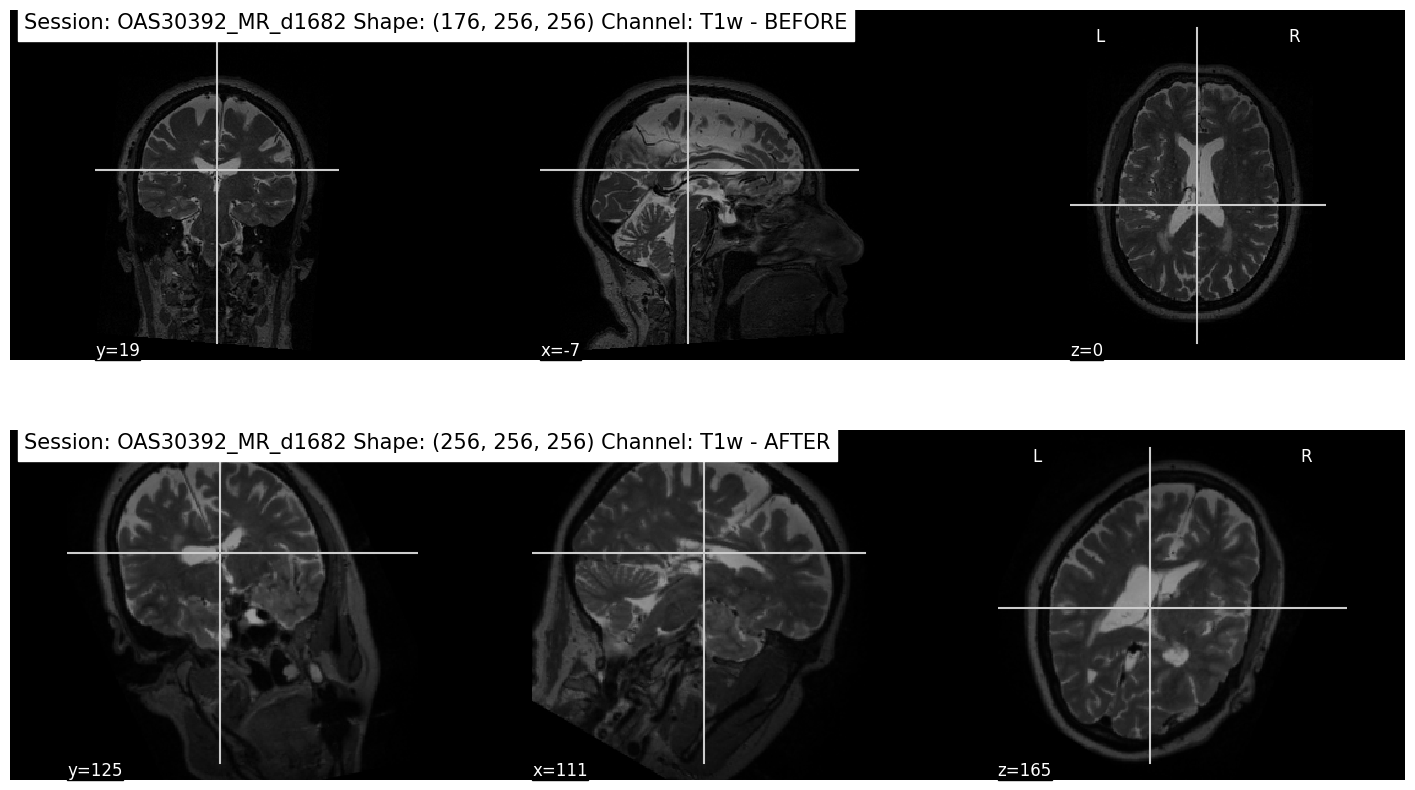

In [5]:
plot.image_transformations(train_data)

## **Training**

- Definition of the training function.

In [7]:
## NOTE: uncomment to execute the training phase.

# train_metrics = training_model(
# 	model = model,
# 	data = [train_data, eval_data],
#   transforms = [train_transform, eval_transform]
# 	epochs = 10,
# 	device = get_device(),
# 	paths = [saved_path, reports_path, logs_path],
# 	num_workers=0,
# 	verbose=True
# )

- Plot of the losses (to the top) and the scores (to the bottom) during the execution of the training phase.

**NOTES**:

1. The early stopping technique has been applied.

2. The verical red line indicates the best run.

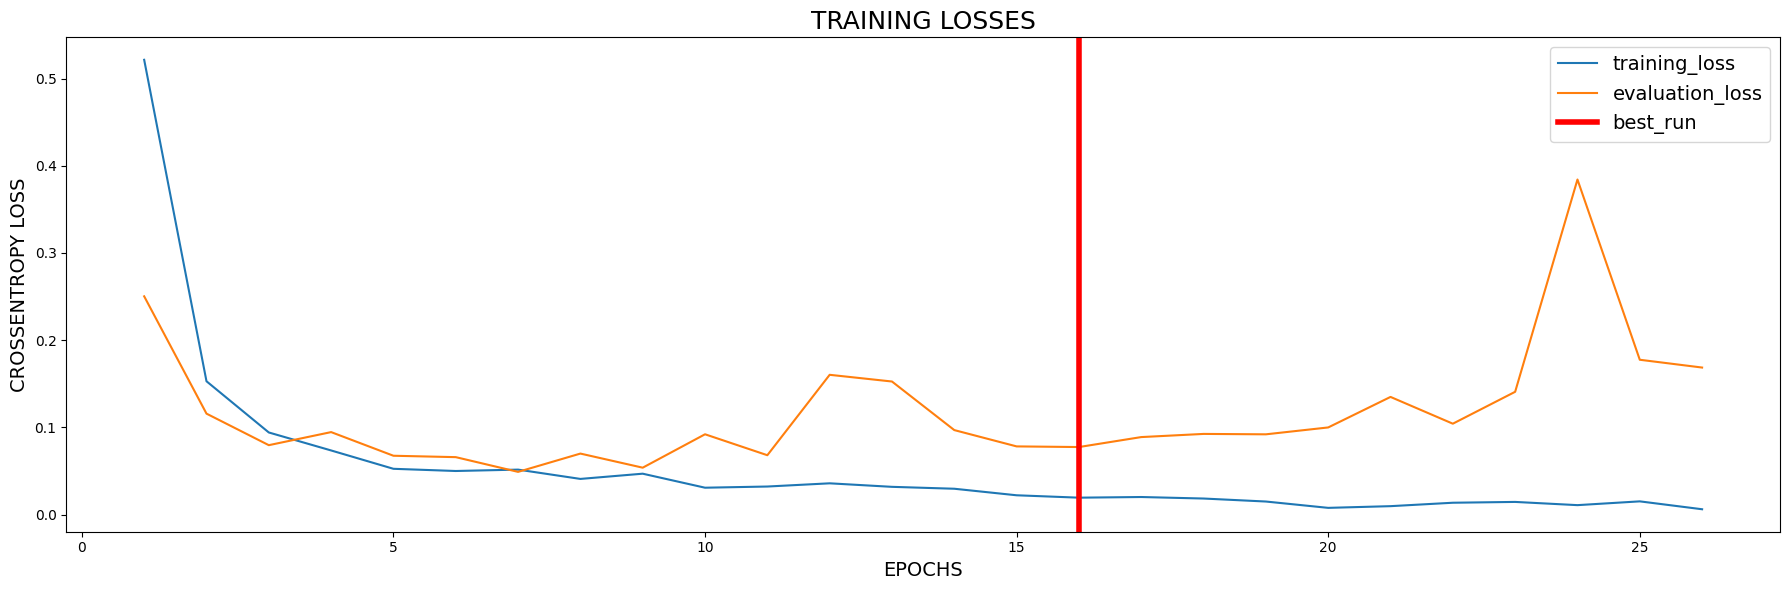

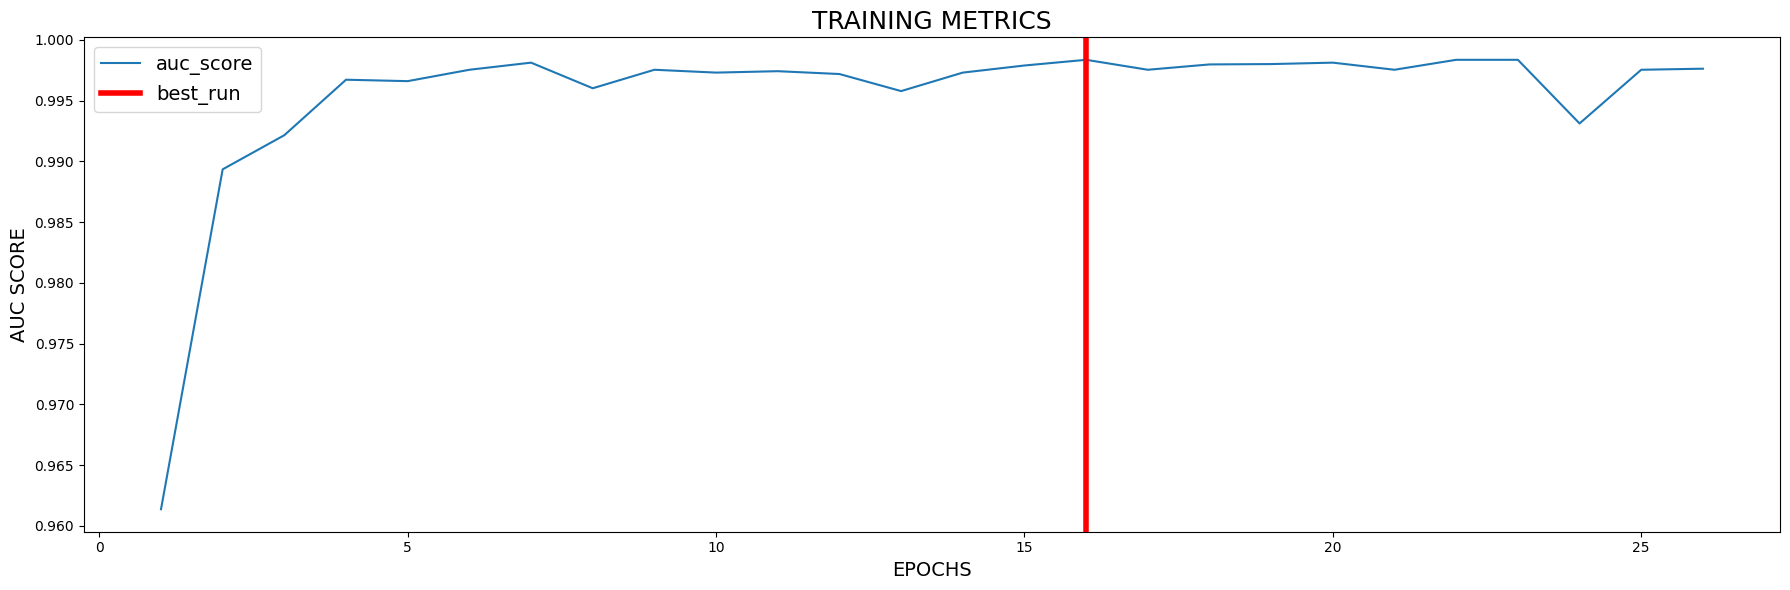

In [3]:
plot.training_values(reports_path)

## **Testing**

- Definition of testing function.

In [9]:
## NOTE: uncomment to execute the prediction on the testing set.

# test_metrics = predict_model(
# 	model = model,
# 	data = test_data,
#   transforms = eval_transform
# 	device = get_device(),
# 	paths = [saved_path, reports_path, logs_path],
# 	num_workers=0,
# 	verbose=True
# )

- Print of the final results for all the expriments related to the **binary classification** of the disease.

In [7]:
plot.results(reports_path)

> > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > 

CHANNEL       SIZE    ACCURACY    PRECISION   RECALL      F1          ROC AUC     AVG         

> > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > 
T1w+T2w       128     0.7955      0.7279      0.9554      0.8263      0.7925      0.8195      
T1w           128     0.7682      0.7402      0.8393      0.7866      0.7669      0.7802      
T2w           128     0.8364      0.7923      0.9196      0.8512      0.8348      0.8469      
T2w           256     0.8227      0.7552      0.9643      0.8471      0.8201      0.8419      
T2w+feat      128     0.9500      0.9174      0.9911      0.9528      0.9492      0.9521      
T1w+T2w+feat  128     0.9364      0.8952      0.9911      0.9407      0.9354      0.9397      
T2w+demo      128     0.8136      0.7448      0.9643      0.8405      0.8108      0.8348      


- Print of the final results for all the expriments related to the **ternary classification** of the disease.

In [8]:
plot.results_multiclass(reports_path)

> > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > 

CHANNEL     METRIC       COGNITIVE_NORMAL    EARLY_STAGE_AD   ALZHEIMER_DISEASE     AVERAGE

> > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > 
T2w         ACCURACY               0.5870            0.8000              0.0870      0.4913
T2w         PRECISION              0.7714            0.3913              0.4000      0.5209
T2w         RECALL                 0.5870            0.8000              0.0870      0.4913
T2w         F1                     0.6667            0.5255              0.1429      0.4450
T2w         ROC_AUC                0.7495            0.5957              0.5105      0.6186
------------------------------------------------------------------------------------------------
T2w         AVG                    0.6723            0.6225              0.2455      0.5134


T2w+demo    ACCURACY               0.8043            0.4222  